# Gradient Boosting Model

In [1]:
import pandas as pd
import numpy as np
import datetime
from sklearn.preprocessing import LabelEncoder
from sklearn.cross_validation import cross_val_score
from xgboost.sklearn import XGBClassifier

from utils.metrics import ndcg_scorer

In [3]:
path = '../data/processed/'
train_users = pd.read_csv(path + 'ohe_count_processed_train_users.csv', nrows=10000)

In [4]:
y_train = train_users['country_destination']
train_users.drop('country_destination', axis=1, inplace=True)
train_users.drop('id', axis=1, inplace=True)
train_users = train_users.fillna(-1)

x_train = train_users.values

test_users_ids = test_users['id']
test_users.drop('id', axis=1, inplace=True)
test_users = test_users.fillna(-1)

x_test = test_users.values

label_encoder = LabelEncoder()
encoded_y_train = label_encoder.fit_transform(y_train)

In [5]:
clf = XGBClassifier(
    max_depth=10,
    learning_rate=0.18,
    n_estimators=30,
    gamma=0,
    min_child_weight=1,
    max_delta_step=0,
    subsample=1,
    colsample_bytree=1,
    colsample_bylevel=1,
    reg_alpha=0,
    reg_lambda=1,
    scale_pos_weight=1,
    base_score=0.5,
    missing=None,
    silent=True,
    nthread=-1,
    seed=42
)

clf.fit(x_train, encoded_y_train)
y_pred = clf.predict_proba(x_test)

In [29]:
a = clf.booster()

In [90]:
%matplotlib inline
b = pd.Series(a.get_fscore())

In [93]:
b.index = map(lambda x: x[1:], b.index)

AttributeError: 'str' object has no attribute 'astype'

In [94]:
b.index = b.index.astype('int16')

In [84]:
b.index = train_users.columns[b.index]

In [41]:
from xgboost.plotting import plot_importance

In [74]:
# Function to store feature map (required by XGBoost.get_fscore)
def create_feature_map(features):
    outfile = open('xgb.fmap', 'w')
    i = 0
    for feat in features:
        outfile.write('{0}\t{1}\tq\n'.format(i, feat))
        i = i + 1
    outfile.close()
import operator

In [75]:
# Get feature scores and store in DataFrame
create_feature_map(list(train_users.columns.values))
importance = clf.booster().get_fscore(fmap='xgb.fmap')
importance_df = pd.DataFrame(
    sorted(importance.items(), key=operator.itemgetter(1)), 
    columns=['feature','fscore']
    )

In [82]:
importance = clf.booster().get_fscore()
pd.Series(importance).sort_values()

f411       1
f485       5
f497       6
f404       6
f446       7
f407       9
f405      11
f420      23
f394      26
f399      28
f368      34
f406      39
f454      40
f430      41
f415      42
f380      43
f455      45
f397      63
f471      67
f464      73
f425      76
f396      82
f453      92
f361      93
f374     102
f438     122
f379     127
f447     138
f492     145
f436     155
        ... 
f484     285
f419     287
f423     297
f460     298
f457     339
f445     358
f432     391
f422     416
f354     473
f418     485
f459     495
f442     502
f373     537
f505     542
f191     547
f479     554
f360     570
f376     595
f456     600
f369     618
f448     622
f470     630
f375     668
f367     699
f366     705
f105     993
f353    2927
f190    3460
f27     5215
f104    5489
dtype: int64

In [51]:
train_users[]

0       -1
1       38
2       56
3       42
4       41
5       -1
6       46
7       47
8       50
9       46
10      36
11      47
12      -1
13      37
14      36
15      33
16      -1
17      31
18      -1
19      29
20      -1
21      30
22      40
23      -1
24      40
25      26
26      -1
27      32
28      35
29      37
        ..
9970    38
9971    27
9972    -1
9973    60
9974    34
9975    39
9976    -1
9977    29
9978    41
9979    28
9980    28
9981    36
9982    36
9983    -1
9984    31
9985    36
9986    52
9987    27
9988    31
9989    30
9990    52
9991    56
9992    25
9993    31
9994    39
9995    32
9996    47
9997    38
9998    35
9999    -1
Name: age, dtype: float64

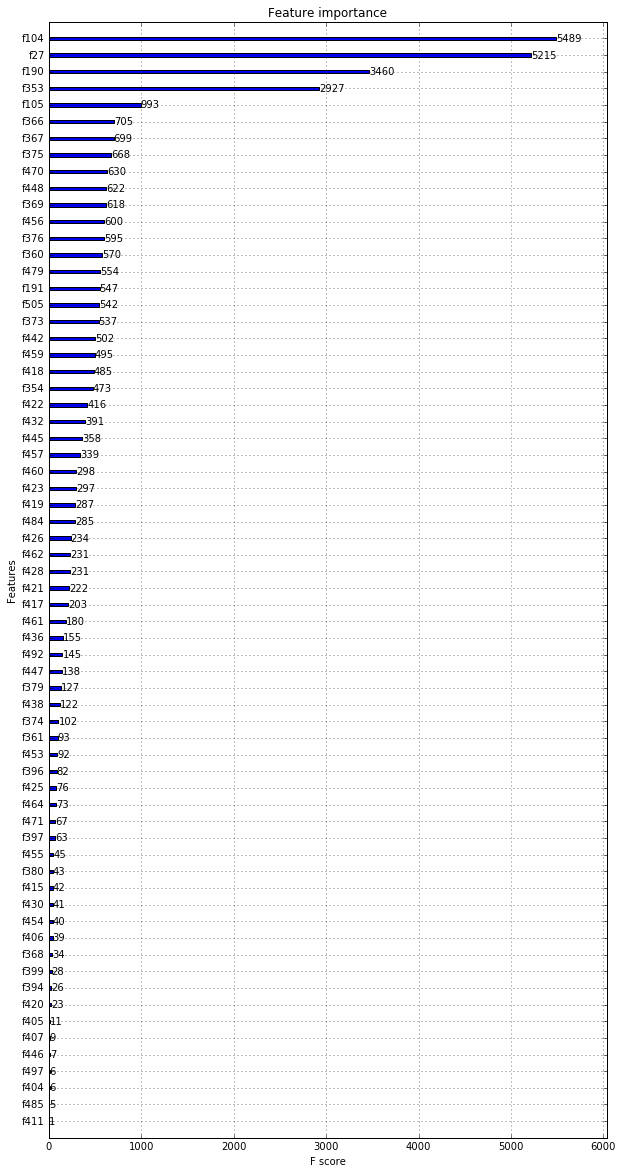

In [49]:
plot_importance(clf.booster(),height=0.2)
from pylab import rcParams
rcParams['figure.figsize'] = 20, 20

In [12]:
ndcg = cross_val_score(clf, x_train, encoded_y_train,
                       verbose=10, cv=5, scoring=ndcg_scorer)

print 'Parameters:', clf.get_params()
print 'Score:', ndcg.mean()

[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.674606 -  24.4s
[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.473992 -  24.4s
[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.680919 -  27.8s
[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.635626 -  25.9s

[Parallel(n_jobs=1)]: Done   1 tasks       | elapsed:   24.4s
[Parallel(n_jobs=1)]: Done   4 tasks       | elapsed:  1.7min



[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.713322 -  27.1s
Parameters: {'reg_alpha': 0, 'colsample_bytree': 1, 'silent': True, 'colsample_bylevel': 1, 'scale_pos_weight': 1, 'learning_rate': 0.18, 'missing': None, 'max_delta_step': 0, 'nthread': -1, 'base_score': 0.5, 'n_estimators': 30, 'subsample': 1, 'reg_lambda': 1, 'seed': 42, 'min_child_weight': 1, 'objective': 'multi:softprob', 'max_depth': 10, 'gamma': 0}
Score: 0.635692883924


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  2.2min finished
